In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import os
import json
from itertools import permutations
from sklearn.decomposition import PCA

np.random.seed(42)

%matplotlib inline

In [2]:
# Set data input folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [3]:
# Load CORUM data
CORUM_data = pd.read_csv('../common_files/CORUM_humanComplexes.txt',sep = '\t')

# Load STRING data
STRING_data = pd.read_csv('../common_files/STRING_data.csv.gz')

# load gene level profiles 
df_gene = pd.read_csv(os.path.join(output_folder,'20240202_6W_CP498_SABER_Pilot_HeLa_SABER_only_guide_normalized_merged_feature_select_median_ALLWELLS_gene_aggregated.csv.gz')).set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# load hit lists 
whole_cell_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_whole_cell_hits.csv')).set_index('Gene')
comp_spec_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_compartment_specific_hits.csv')).set_index('Gene')
hit_list = list(comp_spec_hits.index) + list(whole_cell_hits.index)
df_hits = df_gene.loc[df_gene.index.isin(hit_list)]
df_hits

,Cells_AreaShape_CentralMoment_0_1,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_1,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_1_3,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Extent,...,Nuclei_Texture_SumEntropy_PRSP6_10_01_256,Nuclei_Texture_SumVariance_NfKb_10_01_256,Nuclei_Texture_SumVariance_Syto9_10_00_256,Nuclei_Texture_SumVariance_Syto9_10_01_256,Nuclei_Texture_SumVariance_Syto9_10_02_256,Nuclei_Texture_SumVariance_Syto9_10_03_256,Nuclei_Texture_SumVariance_TDP43_10_01_256,Nuclei_Texture_SumVariance_TDP43_10_02_256,Nuclei_Texture_SumVariance_TDP43_10_03_256,Nuclei_Texture_Variance_Syto9_10_01_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCF1,-0.060312,0.147953,-0.499430,-0.480239,0.015687,0.076740,-0.687840,-0.130226,0.293780,-0.189723,...,1.211825,-0.960585,0.192730,-0.032408,-0.107133,-0.381875,0.785110,1.032315,1.076095,0.045420
ACTR2,0.010109,-0.033853,0.150085,0.098019,-0.049430,-0.000416,0.047961,0.080113,-2.250000,0.824810,...,1.502300,3.948900,1.080285,0.507495,1.133240,0.378950,-0.444100,1.053490,-0.458410,1.284000
ACTR3,0.018373,-0.009114,0.023851,0.046670,0.116575,0.020802,0.009752,-0.004125,-1.898300,1.832850,...,0.510010,2.870150,1.265700,0.085870,1.035450,0.615430,-0.161935,0.792815,-0.475570,0.758960
ADAR,-0.056948,0.193425,0.040800,-0.016710,-0.115169,0.014768,-0.002475,-0.040692,-0.240685,0.396830,...,-0.320125,-0.508175,-0.240020,-0.215960,-0.209105,-0.362375,0.661090,0.554710,0.774045,-0.090365
ALG13,-0.266518,-0.455645,-0.098725,0.299485,0.147973,0.168990,0.182441,0.015312,-0.446610,0.037736,...,-0.109979,1.420500,0.487229,-0.161705,0.435615,-0.228930,-1.943100,-0.650295,-2.097700,0.540010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YWHAH,-0.022833,-0.071204,0.073385,-0.221390,-0.069182,-0.122725,-0.038804,-0.191150,-0.094486,0.034100,...,0.068070,-0.138480,-0.119555,-0.159382,-0.262465,-0.417240,-0.153436,-0.327115,-0.222010,-0.177340
ZC3H8,0.001845,-0.423155,0.490555,0.052490,0.049880,0.138930,-0.180165,-0.146645,-0.493300,0.537175,...,-0.125215,-0.912500,0.199214,0.765830,0.017160,0.398660,0.531960,0.321213,0.604615,0.453625
ZC3HC1,0.340573,-0.089564,0.282530,-0.401705,0.165095,-0.124319,0.176982,-0.058771,-0.153682,0.287885,...,-0.206965,0.616870,-0.430110,0.061355,-0.302654,-0.038280,0.324660,0.301820,0.579965,-0.401915


In [4]:
# Perform principal component analysis on hit list
pca = PCA()
pca.fit(df_hits)
x = list(pca.explained_variance_ratio_)
# Find principal component that represents 90% variation
PCA_lookup = {}
for i in range(len(x)):
    distance = abs(.9-sum(x[:i+1]))
    PCA_lookup[distance] = i 
component = PCA_lookup[min(PCA_lookup.keys())]+1
print (f'Principal component representing closest to 90% variation is {component}')
# Perform principal component analysis and select components representing 90% of variation in data
pca = PCA(n_components=component)
df_hits_pca = pd.DataFrame(pca.fit_transform(df_hits),index=df_hits.index)
df_hits_pca.head()

Principal component representing closest to 90% variation is 28


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
ABCF1,1.713883,-16.622579,18.570770,-1.066941,6.964826,-1.000840,-3.168870,9.399488,-7.798047,-2.509533,...,-1.187287,6.565638,0.551574,-5.886131,-4.155205,0.103741,0.641167,5.901168,0.638670,-2.486444
ACTR2,106.251254,41.893457,-13.692528,-12.729391,-1.627120,9.643667,-7.915208,-5.698228,4.038769,-1.902793,...,0.180620,5.538347,3.281350,-0.077589,-3.388491,-10.012297,-5.680877,-5.543651,-4.421905,0.119937
ACTR3,76.258346,23.232066,-40.383507,-10.363966,3.559745,5.001110,0.529045,-1.388591,8.818312,-2.117843,...,-4.067587,0.650416,5.871605,-9.511405,-4.765764,-1.286127,-2.825571,-3.327868,0.065858,-0.782942
ADAR,-6.129099,-4.057515,-10.337188,-0.961911,-2.793161,1.830298,-4.148030,-0.448398,0.438863,-3.055918,...,-0.827844,1.497937,-0.635262,-0.233626,0.524520,0.544142,0.384060,0.111246,2.197731,1.905092
ALG13,69.097979,-5.674756,10.965231,24.343782,44.205380,9.040328,-8.425224,-9.498928,-21.650701,27.983174,...,1.365965,18.050504,7.403618,-8.455879,-1.193886,0.179756,-7.228942,5.067770,-2.697039,-8.105326


In [5]:
# Calculate correlation between all gene pairs and create a dictionary of gene pairs/correlation
df_hits_corr = df_hits_pca.T.corr()
genes = list(df_hits_corr.index)
corr_dic = {}
for gene1 in genes:
    for gene2 in genes:
        if len(frozenset([gene1,gene2])) == 1 :
            continue
        else:    
            corr_dic[frozenset([gene1,gene2])]=(df_hits_corr.loc[gene1,gene2])
        
print(f'Gene pair correlation dictionary contains {len(corr_dic)} entries')

Gene pair correlation dictionary contains 77028 entries


In [6]:
# Create a list of protein clusters with all complexes that had at least 66% of genes represented within the A549 WGS hits
cluster_count = 0
hit_cluster_list_list = []
hit_set = set()
for i in range(len(CORUM_data)):
    cluster = CORUM_data.iloc[i]['subunits(Gene name)'].split(';')
    count = 0
    hit_cluster_list = []
    for g in cluster:
        if g in genes:
            count += 1
            hit_set.add(g)
            hit_cluster_list.append(g)
    if (count/len(cluster)) > 0.333:
        cluster_count += 1
    if hit_cluster_list and (count/len(cluster)) > 0.333:
        hit_cluster_list_list.append(hit_cluster_list)
print(f'There are {len(hit_set)} unique genes within the cluster')
print(f'There are {cluster_count} clusters within the hit genes with at least 1/3 overlap with a CORUM cluster')
print(f'There are {len(hit_cluster_list_list)} duplicates within the list')

There are 255 unique genes within the cluster
There are 334 clusters within the hit genes with at least 1/3 overlap with a CORUM cluster
There are 334 duplicates within the list


In [7]:
# Assign correlations to hit gene pairs
hit_pair_set = set()
for l in hit_cluster_list_list:
    for c in list(permutations(l,2)):
        hit_pair_set.add(frozenset(c))

hit_corr_dic = {}
for s in hit_pair_set:
    if len(s) != 1:
        hit_corr_dic[s] = corr_dic[s]

print(f'There are {len(hit_pair_set)} hit pairs.')
print(f'There are {len(hit_corr_dic)} hit pairs with correlation.')

There are 77 hit pairs.
There are 77 hit pairs with correlation.


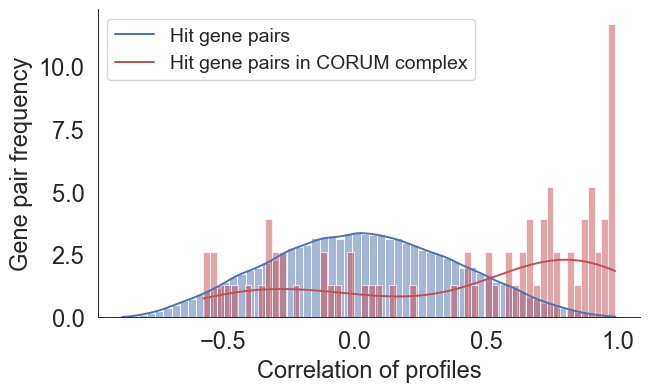

In [8]:
# Plot CORUM gene pair correlation distribution
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7,'xtick.labelsize':17,'ytick.labelsize':17})

fig, ax = plt.subplots(figsize=(7,4))
a = list(corr_dic.values())
b = list(hit_corr_dic.values())

sns.histplot(a ,color='b' ,stat= 'percent' ,bins= 60, kde=True, line_kws={'lw':1.4} , alpha=0.5,ax = ax);
sns.histplot(b ,color='r' ,stat= 'percent' ,bins= 60, kde=True, line_kws={'lw':1.4} ,alpha=0.5,ax = ax);

ax.set_ylabel('Gene pair frequency',size=17)
ax.set_xlabel('Correlation of profiles',size=17)
font = font_manager.FontProperties(size=14)
ax.legend(['Hit gene pairs','Hit gene pairs in CORUM complex'],loc='upper left',prop=font )
sns.despine(top = True)

fig.savefig(os.path.join(output_folder,'figure_panels','HeLa_SABER_CORUM_gene_pair_correlation_distribution.png'), dpi=300,facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [9]:
# Calculate the median values for correlations for background gene pairs and gene pairs in CORUM clusters 
print("Background gene pair profile correlation median",np.median(list(corr_dic.values())))
print("Gene pairs in CORUM clusters profile correlation median",np.median(list(hit_corr_dic.values())))

Background gene pair profile correlation median 0.029476691623080496
Gene pairs in CORUM clusters profile correlation median 0.6332501458173259


In [10]:
# Subset the STRING predicted protein links to  hits
STRING_data_hits = STRING_data[STRING_data['protein1'].isin(genes) & STRING_data['protein2'].isin(genes)]
print(f'Full PPI database is {len(STRING_data)} entries')
print(f'PPI database subsetted to hits is {len(STRING_data_hits)} entries')
corr_min = min(corr_dic.values())
corr_max = max(corr_dic.values())   
print(f'Minimum correlation is {corr_min}')
print(f'Maximum correlation is {corr_max}')

Full PPI database is 11938498 entries
PPI database subsetted to hits is 22094 entries
Minimum correlation is -0.8823929360181888
Maximum correlation is 0.9915853438092632


In [11]:
# Bin the correlations into 8 categories 
results = STRING_data_hits.copy(deep=True).reset_index(drop=True)

bins = [-1,-0.66,-0.33,0,0.33,0.66,1]
for i in range(len(results)):
    gene1 = results.iloc[i]['protein1']
    gene2 = results.iloc[i]['protein2']
    corr_value = corr_dic[frozenset([gene1,gene2])]
    results.at[i , 'correlation'] = corr_value
    if corr_value > bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[5]} to {bins[6]}'
    elif corr_value > bins[4] and corr_value <= bins[5]:
        results.at[i , 'correlation_bin'] = f'{bins[4]} to {bins[5]}'
    elif corr_value > bins[3] and corr_value <= bins[4]:
        results.at[i , 'correlation_bin'] = f'{bins[3]} to {bins[4]}'
    elif corr_value > bins[2] and corr_value <= bins[3]:
        results.at[i , 'correlation_bin'] = f'{bins[2]} to {bins[3]}'
    elif corr_value > bins[1] and corr_value <= bins[2]:
        results.at[i , 'correlation_bin'] = f'{bins[1]} to {bins[2]}'
    elif corr_value <= bins[1]:
        results.at[i , 'correlation_bin'] = f'{bins[0]} to {bins[1]}'
results.head()

,protein1,protein2,combined_score,correlation,correlation_bin
0,M6PR,TMED2,176,-0.398831,-0.66 to -0.33
1,M6PR,ARF4,169,-0.700586,-1 to -0.66
2,M6PR,MTOR,174,0.135605,0 to 0.33
3,M6PR,MCOLN1,240,0.529485,0.33 to 0.66
4,M6PR,VPS41,193,0.495634,0.33 to 0.66


/var/folders/pm/r5xv70_14yx_b9gflxr4xck40000gp/T/ipykernel_88415/1755501725.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(float(label))) for label in labels], size=16)


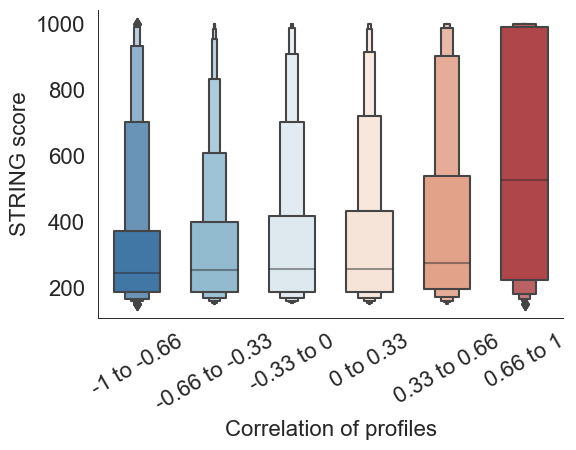

In [12]:
# Plot STRING score x gene pair correlation
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7})

fig, ax = plt.subplots(figsize=(6,4))
order = [f'{bins[0]} to {bins[1]}',f'{bins[1]} to {bins[2]}',f'{bins[2]} to {bins[3]}',f'{bins[3]} to {bins[4]}',f'{bins[4]} to {bins[5]}',f'{bins[5]} to {bins[6]}']

flierprops = dict(markerfacecolor='white', markersize=0.1, linestyle='none')
sns.boxenplot(data=results,
            x = 'correlation_bin',
            y = 'combined_score',
            order=order, 
            width = 0.6,
            palette = 'RdBu_r',
            ax=ax)

ax.set_xlabel('Correlation of profiles',size=16)
ax.set_ylabel('STRING score',size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
labels = [item for item in ax.get_yticks()]
ax.set_yticklabels([str(round(float(label))) for label in labels], size=16)
ax.set_xticklabels(order, size=16,rotation=30)
sns.despine(top = True,left=False,bottom=False)

fig.savefig(os.path.join(output_folder,'figure_panels','HeLa_SABER_STRING_gene_pair_correlation_score.png'), 
            dpi=300,
            facecolor='w', 
            edgecolor='w', 
            bbox_inches='tight')
plt.show()
